In [6]:
import numpy as np
import s3fs
import requests
import pandas as pd
import zipfile
import io
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

In [7]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
              'October', 'November', 'December']
def print_csv_names(bucket_name, file_name):
    path_to_file = f'../data/{bucket_name}/{file_name}'
    zip_file = zipfile.ZipFile(path_to_file)
    fs = {month: {} for month in month_list}
    zip_file.printdir()
    print('\n')
    for text_file in zip_file.infolist():
        if text_file.filename.endswith('.csv'):
            print(text_file.filename)

In [8]:
print_csv_names('tripdata', '2013-citibike-tripdata.zip')
#'2013-citibike-tripdata/1_January/201301-citibike-tripdata_1.csv'

File Name                                             Modified             Size
2013-citibike-tripdata/                        2024-02-22 00:06:56            0
2013-citibike-tripdata/4_April/                2024-02-14 10:09:16            0
2013-citibike-tripdata/12_December/            2024-02-22 00:03:04            0
2013-citibike-tripdata/.DS_Store               2024-02-22 00:07:16        12292
__MACOSX/2013-citibike-tripdata/._.DS_Store    2024-02-22 00:07:16          120
2013-citibike-tripdata/201309-citibike-tripdata.csv 2014-03-27 23:40:34    201965642
__MACOSX/2013-citibike-tripdata/._201309-citibike-tripdata.csv 2014-03-27 23:40:34          276
2013-citibike-tripdata/11_November/            2024-02-22 00:03:00            0
2013-citibike-tripdata/7_July/                 2024-02-22 00:02:38            0
2013-citibike-tripdata/201311-citibike-tripdata.csv 2014-03-27 23:43:44    131891356
__MACOSX/2013-citibike-tripdata/._201311-citibike-tripdata.csv 2014-03-27 23:43:44          27

In [9]:
print_csv_names('tripdata', '2020-citibike-tripdata.zip')

File Name                                             Modified             Size
2020-citibike-tripdata/                        2024-07-31 14:12:48            0
2020-citibike-tripdata/202004-citibike-tripdata.zip 2024-07-31 13:33:20    126390478
2020-citibike-tripdata/202012-citibike-tripdata.zip 2024-07-31 14:09:08    201516988
2020-citibike-tripdata/202006-citibike-tripdata.zip 2024-07-31 13:35:56    349051345
2020-citibike-tripdata/202010-citibike-tripdata.zip 2024-07-31 14:02:40    416597861
2020-citibike-tripdata/202008-citibike-tripdata.zip 2024-07-31 13:38:28    431507576
2020-citibike-tripdata/202002-citibike-tripdata.zip 2024-07-31 13:30:00    210735600
2020-citibike-tripdata/202005-citibike-tripdata.zip 2024-07-31 13:34:12    275943573
2020-citibike-tripdata/202011-citibike-tripdata.zip 2024-07-31 13:43:46    322004214
2020-citibike-tripdata/202007-citibike-tripdata.zip 2024-07-31 13:37:12    389607634
2020-citibike-tripdata/202009-citibike-tripdata.zip 2024-07-31 13:40:56    

# Inconsistencies in citibike file naming:

- Three different formats:

2013-citibike-tripdata/7_July/201307-citibike-tripdata_1.csv, sometimes 2013-citibike-tripdata/7_July/201307-citibike-tripdata_2.csv exists

- In 2017, files are named .csv_1.csv and .csv_2.csv:

2017-citibike-tripdata/7_July/201707-citibike-tripdata.csv_1.csv

- After 2019 files are also named different.
2020-citibike-tripdata/202008-citibike-tripdata.zip

In [10]:
# Test methods 
month_list_short = [month[:3] for month in month_list]
month_dict = {month: f"{i + 1}" for i, month in enumerate(month_list)}


def get_test_data():
    with zipfile.ZipFile('../data/tripdata/2013-citibike-tripdata.zip', 'r') as zip_file:
        month_df = pd.read_csv(zip_file.open('2013-citibike-tripdata/201306-citibike-tripdata.csv'), encoding='latin-1')
    return month_df
    
def get_test_data_2023():
    with zipfile.ZipFile('../data/tripdata/2023-citibike-tripdata.zip', 'r') as zip_file:
        month_df = pd.read_csv(zip_file.open('2023-citibike-tripdata/202301-citibike-tripdata.zip'), encoding='latin-1')
    return month_df

# Prints column names for each year given a single month
def get_col_names_per_year(month='June'):
    for year in range(2013, 2024):
        print(year)
        with zipfile.ZipFile(f'../data/tripdata/{year}-citibike-tripdata.zip', 'r') as zip_file:
            if year == 2017:
                month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/6_June/{year}06-citibike-tripdata.csv_1.csv'), encoding='latin-1')

            elif year < 2020:
                month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/{month_dict[month]}_{month}/{year}{int(month_dict[month]):02d}-citibike-tripdata_1.csv'), encoding='latin-1')
            else:
                month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/{year}{int(month_dict[month]):02d}-citibike-tripdata.zip'), encoding='latin-1')

        print(month_df.columns)


In [11]:
test_df = get_test_data()

In [12]:
test_df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
5,2028,2013-06-01 00:01:47,2013-06-01 00:35:35,485,W 37 St & 5 Ave,40.750380,-73.983390,406.0,Hicks St & Montague St,40.695128,-73.995951,18445,Customer,NaN,0
6,2057,2013-06-01 00:02:33,2013-06-01 00:36:50,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,1
7,369,2013-06-01 00:03:29,2013-06-01 00:09:38,509,9 Ave & W 22 St,40.745497,-74.001971,521.0,8 Ave & W 31 St N,40.750967,-73.994442,16100,Subscriber,1981.0,1
8,1829,2013-06-01 00:03:47,2013-06-01 00:34:16,265,Stanton St & Chrystie St,40.722293,-73.991475,436.0,Hancock St & Bedford Ave,40.682166,-73.953990,15234,Subscriber,1984.0,1
9,829,2013-06-01 00:04:22,2013-06-01 00:18:11,404,9 Ave & W 14 St,40.740583,-74.005509,303.0,Mercer St & Spring St,40.723627,-73.999496,16400,Subscriber,1987.0,1


In [13]:
test_df_2023 = get_test_data_2023()

C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\1317926413.py:13: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open('2023-citibike-tripdata/202301-citibike-tripdata.zip'), encoding='latin-1')


In [14]:
test_df_2023.head(10)

,PK,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DC1CB984821DFFF7,classic_bike,2023-01-07 15:36:53.430,2023-01-07 15:39:45.406,Vesey St & Church St,5216.06,Albany St & Greenwich St,5145.02,40.71222,-74.010472,40.709267,-74.013247,member
1,C00CA02971557F16,classic_bike,2023-01-04 19:23:01.234,2023-01-04 19:34:57.151,Lispenard St & Broadway,5391.06,St Marks Pl & 1 Ave,5626.13,40.719392,-74.002472,40.727791,-73.985649,member
2,C753AE5EBD8458F9,classic_bike,2023-01-20 09:22:19.894,2023-01-20 10:23:24.255,3 Ave & Schermerhorn St,4437.01,State St & Smith St,4522.07,40.686832,-73.979677,40.68917,-73.9886,member
3,E4415A543C1972A7,classic_bike,2023-01-24 10:38:01.135,2023-01-24 10:41:40.749,E 5 St & Ave A,5626.06,E 1 St & 1 Ave,5593.01,40.72479,-73.984301,40.723356,-73.98865,member
4,BD52A87B215877C7,electric_bike,2023-01-13 10:17:38.192,2023-01-13 10:33:59.099,W 54 St & 11 Ave,6955.05,Washington St & Gansevoort St,6039.06,40.768292,-73.992563,40.739323,-74.008119,member
5,4FC76B63F9FE631F,classic_bike,2023-01-26 19:17:23.200,2023-01-26 19:47:05.287,W 59 St & 10 Ave,7023.04,E 1 St & 1 Ave,5593.01,40.770513,-73.988038,40.723356,-73.98865,member
6,680C4E3A801B0839,electric_bike,2023-01-13 12:25:17.234,2023-01-13 12:38:53.514,W 54 St & 11 Ave,6955.05,Washington St & Gansevoort St,6039.06,40.768243,-73.992777,40.739323,-74.008119,member
7,153486234EA3E427,electric_bike,2023-01-10 08:29:04.191,2023-01-10 08:33:49.274,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member
8,D24D370D9CE13CB4,classic_bike,2023-01-11 08:32:01.889,2023-01-11 08:38:26.498,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member
9,98E7D95A8B9B2249,classic_bike,2023-01-01 16:40:29.769,2023-01-01 16:48:04.256,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member


In [15]:
test_df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795414 entries, 0 to 1795413
Data columns (total 13 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   PK               object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   start_lat           object
 9   start_lng           object
 10  end_lat             object
 11  end_lng             object
 12  member_casual       object
dtypes: object(13)
memory usage: 178.1+ MB


In [16]:
test_df_2023[test_df_2023.columns[0]].value_counts()

PK
DC1CB984821DFFF7    1
F307A55F6B06B73F    1
7A366DE72CC5E7F1    1
F2379832CBB1C731    1
8584DFC498892B3B    1
                   ..
C912436372957802    1
DDED073DACDEB231    1
35FE7F2F711919E6    1
D551D33D83882959    1
PK             1
Name: count, Length: 1795414, dtype: int64

In [17]:
get_col_names_per_year('October')

2013
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
2014
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
2015
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
2016

C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\1317926413.py:27: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/{year}{int(month_dict[month]):02d}-citibike-tripdata.zip'), encoding='latin-1')


Index(['PK', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
2021


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\1317926413.py:27: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/{year}{int(month_dict[month]):02d}-citibike-tripdata.zip'), encoding='latin-1')


Index(['PK', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
2022


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\1317926413.py:27: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/{year}{int(month_dict[month]):02d}-citibike-tripdata.zip'), encoding='latin-1')


Index(['PK', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
2023


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\1317926413.py:27: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/{year}{int(month_dict[month]):02d}-citibike-tripdata.zip'), encoding='latin-1')


Index(['PK', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


# Inconsistencies in citibike column naming:
- 2013 to 2019:

tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'
- In 2016 October, column names are capitalized and have a space
- After 2019:

'PK', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'

- After 2019 no birth year, gender, and tripduration (can be calculated)
- New after 2019: Ride ID, Rideable type

In [18]:
# Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member
# Subscriber and member is the same.
print(test_df['usertype'].unique())
print(test_df_2023['member_casual'].unique())

['Subscriber' 'Customer']
['member' 'casual' 'member_casual' nan]


In [19]:
# Monthly CSV files can be missing or corrupted:
with zipfile.ZipFile(f'../data/tripdata/2023-citibike-tripdata.zip', 'r') as zip_file:
    feb_df_2023 = pd.read_csv(zip_file.open(f'2023-citibike-tripdata/202302-citibike-tripdata.zip'), encoding='latin-1')
    print(feb_df_2023.columns)

C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\739335114.py:3: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  feb_df_2023 = pd.read_csv(zip_file.open(f'2023-citibike-tripdata/202302-citibike-tripdata.zip'), encoding='latin-1')


Index(['PK'], dtype='object')


In [20]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             577703 non-null  int64  
 1   starttime                577703 non-null  object 
 2   stoptime                 577703 non-null  object 
 3   start station id         577703 non-null  int64  
 4   start station name       577703 non-null  object 
 5   start station latitude   577703 non-null  float64
 6   start station longitude  577703 non-null  float64
 7   end station id           559644 non-null  float64
 8   end station name         559644 non-null  object 
 9   end station latitude     559644 non-null  float64
 10  end station longitude    559644 non-null  float64
 11  bikeid                   577703 non-null  int64  
 12  usertype                 577703 non-null  object 
 13  birth year               337382 non-null  float64
 14  gend

In [21]:
test_df['starttime'] = pd.to_datetime(test_df['starttime'])
test_df['stoptime'] = pd.to_datetime(test_df['stoptime'])

test_df['usertype'] = test_df['usertype'].astype('category')
test_df['start station name'] = test_df['start station name'].astype('category')
test_df['end station name'] = test_df['end station name'].astype('category')
test_df['gender'] = test_df['gender'].astype('category')
for column in test_df.columns:
    if test_df[column].dtype == 'int64':
        test_df[column] = pd.to_numeric(test_df[column], downcast='integer')
    elif test_df[column].dtype == 'float64':#
        test_df[column] = pd.to_numeric(test_df[column], downcast='float')


In [22]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             577703 non-null  int32         
 1   starttime                577703 non-null  datetime64[ns]
 2   stoptime                 577703 non-null  datetime64[ns]
 3   start station id         577703 non-null  int16         
 4   start station name       577703 non-null  category      
 5   start station latitude   577703 non-null  float32       
 6   start station longitude  577703 non-null  float32       
 7   end station id           559644 non-null  float32       
 8   end station name         559644 non-null  category      
 9   end station latitude     559644 non-null  float32       
 10  end station longitude    559644 non-null  float32       
 11  bikeid                   577703 non-null  int16         
 12  usertype        

## Converting columns to different dtype reduces memory from 247 MB to 30 MB

# Functions to load and process citibike and nypd data:

In [23]:
# Functions to load and process data
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
              'October', 'November', 'December']
month_list_short = [month[:3] for month in month_list]


# Ensure dataframe naming consistency and apply memory optimizations
def process_citibike_csv(df: pd.DataFrame, month: str, year: str) -> pd.DataFrame:
    column_names = {
        'started_at': 'starttime',
        'ended_at': 'stoptime',
        'start_station_name':'start station name',
        'start_station_id': 'start station id',
        'end_station_name': 'end station name',
        'end_station_id': 'end station id',
        'start_lat': 'start station latitude',
        'start_lng': 'start station longitude',
        'end_lat': 'end station latitude',
        'end_lng': 'end station longitude',
        'member_casual': 'usertype',
        'rideable_type': 'rideable type',
        'Bike ID':'bikeid',
        'Start Time':'starttime',
        'Stop Time':'stoptime',
        'Start Station Name':'start station name',
        'Start Station ID':'start station id',
        'End Station Name':'end station name',
        'End Station ID':'end station id',
        'Start Station Latitude':'start station latitude',
        'Start Station Longitude':'start station longitude',
        'End Station Latitude':'end station latitude',
        'End Station Longitude':'end station longitude',
        'User Type':'usertype',
        'Birth Year':'birth year',
        'Trip Duration':'tripduration',
        'Gender': 'gender'
    }
    
    # Ensure consisten column naming between 2013-2019 and 2020-2023
    df.rename(columns = column_names, inplace=True)
    
    df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')
    df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')
    
    # After 2019 no birth year, gender, and tripduration
    if int(year) < 2020:
        # Invalid birth years get convertet to NaN
        df['birth year'] = pd.to_numeric(df['birth year'], errors='coerce', downcast='integer')
        df['gender'] = df['gender'].astype('category')
        df['birth year'] = pd.to_numeric(df['birth year'], downcast='integer', errors='coerce')
        df['bikeid'] = pd.to_numeric(df['bikeid'], downcast='integer', errors='coerce') 

    else:
        df['usertype'] = (df['usertype'].replace({'member':'Subscriber','casual': 'Customer'}))
        df['rideable type'] =  pd.Categorical(df['rideable type'])

    df['start station id'] = pd.to_numeric(df['start station id'], downcast='integer', errors='coerce')  
    df['start station latitude'] = pd.to_numeric(df['start station latitude'], downcast='float', errors='coerce')
    df['start station longitude'] = pd.to_numeric(df['start station longitude'], downcast='float', errors='coerce')        

    df['end station id'] = pd.to_numeric(df['end station id'], downcast='integer', errors='coerce')  
    df['end station latitude'] = pd.to_numeric(df['end station latitude'], downcast='float', errors='coerce')
    df['end station longitude'] = pd.to_numeric(df['end station longitude'], downcast='float', errors='coerce')

    df['month'] = month
    df['month'] = pd.Categorical(df['month'], categories=month_list_short, ordered=True)
    df['usertype'] =  pd.Categorical(df['usertype'])
    
    return df


# Input: path or buffer
# Output: if month = None: dataframe holding all trip data for a whole year 
# if month != None: dataframe for this month
def process_citibike_zip_file(zip_input_path, year, month=None) -> pd.DataFrame:

    # Construct output dictionary
    dataframes = []
    alrd_processed = set()
    if month is None:
        month_dict = {i + 1: month for i, month in enumerate(month_list)}
    else:
        month_dict = {month_list.index(month) + 1 : month}
    with zipfile.ZipFile(zip_input_path, 'r') as zip_file:
        
        for month_id in month_dict.keys():
            print(f'Processing {year} {month_dict[month_id]}')
            if year == 2017:
                df_path = f'{year}-citibike-tripdata/{month_id}_{month_dict[month_id]}/{year}{month_id:02d}-citibike-tripdata.csv_1.csv'
                df_path_2 = f'{year}-citibike-tripdata/{month_id}_{month_dict[month_id]}/{year}{month_id:02d}-citibike-tripdata.csv_2.csv'

            elif year < 2020:
                df_path = f'{year}-citibike-tripdata/{month_id}_{month_dict[month_id]}/{year}{month_id:02d}-citibike-tripdata_1.csv'
                df_path_2 = f'{year}-citibike-tripdata/{month_id}_{month_dict[month_id]}/{year}{month_id:02d}-citibike-tripdata_2.csv'

                #month_df = pd.read_csv(zip_file.open(f'{year}-citibike-tripdata/6_June/{year}06-citibike-tripdata_1.csv'), encoding='latin-1')

            else:
                df_path = f'{year}-citibike-tripdata/{year}{month_id:02d}-citibike-tripdata.zip'
                df_path_2 = None
            try:
                month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')
                
            # CSV files can be missing
            except Exception as e:
                #print(e)
                print(f'No csv found for {year} {month_dict[month_id]}')
                continue
                
            if df_path_2 is not None:
                try:
                    month_df_2 = pd.read_csv(zip_file.open(df_path_2), encoding='latin-1')
                    month_df = pd.concat([month_df, month_df_2])
                    print(f'{year} {month_dict[month_id]} has more than 1 million entries.')
                except:
                    pass
                        
            
                
            # Drops tripduration if year < 2020, or PK if year > 2019
            # tripduration can be easily calculated from start and end timestamp
            # PK is unique identifier - not needed
            if len(month_df.columns) < 3:
                print(f"{month_dict[month_id]} CSV file is corrupted, skipping!")
            month_df.drop(month_df.columns[0], axis=1, inplace=True)
            month_df = process_citibike_csv(month_df, month_dict[month_id][:3], year)
            
            dataframes.append(month_df)
        
    total_rows = 0
    full_df = pd.concat(dataframes)

    print(f'Total no. of rows: {len(full_df.index)}')
    print(f'Memory usage:')
    print(full_df.info(memory_usage='deep'))
    
    return full_df


def process_nypd_data(input_path) -> pd.DataFrame:
    df = pd.read_csv(input_path)
    # Location is tuple of latitude and longitude
    df.drop(['BOROUGH', 'ZIP CODE', 'CROSS STREET NAME', 'OFF STREET NAME',
             'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 
             'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',# 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
             'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)
    df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
    df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour
    return df


# Citibike Data: Creates zipfile.Zipfile from csv.zip saved on local disk
# Tries to get csv from ../data/BUCKET_NAME/FILE_NAME.zip
def load_data_offline(bucket_name: str, year: int, month: str) -> pd.DataFrame:
    
    if bucket_name == 'tripdata':
        file_name = f'{year}-citibike-tripdata.zip'
        path_to_file = f'../data/{bucket_name}/{file_name}'

        return process_citibike_zip_file(path_to_file, year, month)
        
    elif bucket_name == 'nypd':
        file_name = f'Motor_Vehicle_Collisions_-_Crashes_20241129.csv'
        path_to_file = f'../data/{bucket_name}/{file_name}'
        
        return process_nypd_data(path_to_file)
    else:
        raise NotImplementedError
        

# Citibike data: Creates zipfile.Zipfile from public access s3 URL
def load_data_online(bucket_name: str, year: int, month: str) -> pd.DataFrame:
    if bucket_name == 'tripdata':
        file_name = f'{year}-citibike-tripdata.zip'
        response = requests.get(f'https://s3.amazonaws.com/{bucket_name}/{file_name}')
        if response.status_code == 200:
            print("Successfully downloaded the zip file.")
            # Load zip file into memory
            buffer = io.BytesIO(response.content)
            
            return process_citibike_zip_file(buffer, year, month)
        else:
            print(f'Http get request Error {response.status_code}')
    elif bucket_name == 'nypd':
        url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/files/bd7ab0b2-d48c-48c4-a0a5-590d31a3e120?download=true&filename=MVCollisionsDataDictionary_20190813_ERD.xlsx'
        return process_nypd_xlsx(url)


def load_data(bucket_name: str, year: int = None, month: str = None) -> pd.DataFrame:
    try:
        print('Trying to load file from disk.')
        data = load_data_offline(bucket_name, year, month)
        print('Loaded file from disk.')

    except FileNotFoundError:
        print('Could not load from disk, loading from URL.')
        data = load_data_online(bucket_name, year, month)
        print('Loaded file from URL.')
        
    except:
        raise FileNotFoundError("Could not load file from disk or URL.")
        
    finally:
        return data


In [24]:
data_2013 = load_data('tripdata', 2013)

Trying to load file from disk.
Processing 2013 January
No csv found for 2013 January
Processing 2013 February
No csv found for 2013 February
Processing 2013 March
No csv found for 2013 March
Processing 2013 April
No csv found for 2013 April
Processing 2013 May
No csv found for 2013 May
Processing 2013 June
Processing 2013 July
Processing 2013 August
2013 August has more than 1 million entries.
Processing 2013 September
2013 September has more than 1 million entries.
Processing 2013 October
2013 October has more than 1 million entries.
Processing 2013 November
Processing 2013 December
Total no. of rows: 5614888
Memory usage:
<class 'pandas.core.frame.DataFrame'>
Index: 5614888 entries, 0 to 443965
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   starttime                datetime64[ns]
 1   stoptime                 datetime64[ns]
 2   start station id         int16         
 3   start station name       object

In [25]:
data_2014 = load_data('tripdata', 2014)

Trying to load file from disk.
Processing 2014 January
Processing 2014 February
Processing 2014 March
Processing 2014 April
Processing 2014 May
Processing 2014 June
Processing 2014 July
Processing 2014 August
Processing 2014 September
Processing 2014 October
Processing 2014 November
Processing 2014 December
Total no. of rows: 8081216
Memory usage:
<class 'pandas.core.frame.DataFrame'>
Index: 8081216 entries, 0 to 399068
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   starttime                datetime64[ns]
 1   stoptime                 datetime64[ns]
 2   start station id         int16         
 3   start station name       object        
 4   start station latitude   float32       
 5   start station longitude  float32       
 6   end station id           int16         
 7   end station name         object        
 8   end station latitude     float32       
 9   end station longitude    float32       
 10

In [26]:
data_2019 = load_data('tripdata', 2019)

Trying to load file from disk.
Processing 2019 January
Processing 2019 February
Processing 2019 March
2019 March has more than 1 million entries.
Processing 2019 April
2019 April has more than 1 million entries.
Processing 2019 May
2019 May has more than 1 million entries.
Processing 2019 June
2019 June has more than 1 million entries.
Processing 2019 July
2019 July has more than 1 million entries.
Processing 2019 August
2019 August has more than 1 million entries.
Processing 2019 September
2019 September has more than 1 million entries.
Processing 2019 October
2019 October has more than 1 million entries.
Processing 2019 November
2019 November has more than 1 million entries.
Processing 2019 December
Total no. of rows: 19363566
Memory usage:
<class 'pandas.core.frame.DataFrame'>
Index: 19363566 entries, 0 to 955209
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   starttime                datetime64[ns]
 1  

In [27]:
data_2022_Feb = load_data('tripdata', 2022, 'February')

Trying to load file from disk.
Processing 2022 February


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Total no. of rows: 1197315
Memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197315 entries, 0 to 1197314
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   rideable type            1197313 non-null  category      
 1   starttime                1197312 non-null  datetime64[ns]
 2   stoptime                 1197312 non-null  datetime64[ns]
 3   start station name       1197312 non-null  object        
 4   start station id         1197303 non-null  float64       
 5   end station name         1195075 non-null  object        
 6   end station id           1195020 non-null  float64       
 7   start station latitude   1197312 non-null  float32       
 8   start station longitude  1197312 non-null  float32       
 9   end station latitude     1196116 non-null  float32       
 10  end station longitude    1196116 non-null  float32       
 11  usertype              

In [28]:
data_2021 = load_data('tripdata', 2021)

Trying to load file from disk.
Processing 2021 January
No csv found for 2021 January
Processing 2021 February


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 March


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 April


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 May


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 June


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 July


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 August


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 September
No csv found for 2021 September
Processing 2021 October


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 November


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Processing 2021 December


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:102: DtypeWarning: Columns (5,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  month_df = pd.read_csv(zip_file.open(df_path), encoding='latin-1')


Total no. of rows: 22811920
Memory usage:
<class 'pandas.core.frame.DataFrame'>
Index: 22811920 entries, 0 to 1706502
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   rideable type            object        
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station name       object        
 4   start station id         float64       
 5   end station name         object        
 6   end station id           float64       
 7   start station latitude   float32       
 8   start station longitude  float32       
 9   end station latitude     float32       
 10  end station longitude    float32       
 11  usertype                 object        
 12  month                    category      
dtypes: category(1), datetime64[ns](2), float32(4), float64(2), object(4)
memory usage: 7.4 GB
None
Loaded file from disk.


# Inspect citibike trip data

In [29]:
def plot_tripcount_monthly(year: str, year_dict: dict):
    month_counts = year_dict['month'].value_counts().sort_index()
    fig = plt.figure(figsize = (10, 5))
    month_counts.plot(kind='bar', width=0.7)
    
    plt.xlabel("month")
    plt.ylabel("No. of trips")
    plt.title(f"Citibike Total Trips per Month in {year}")
    plt.show()

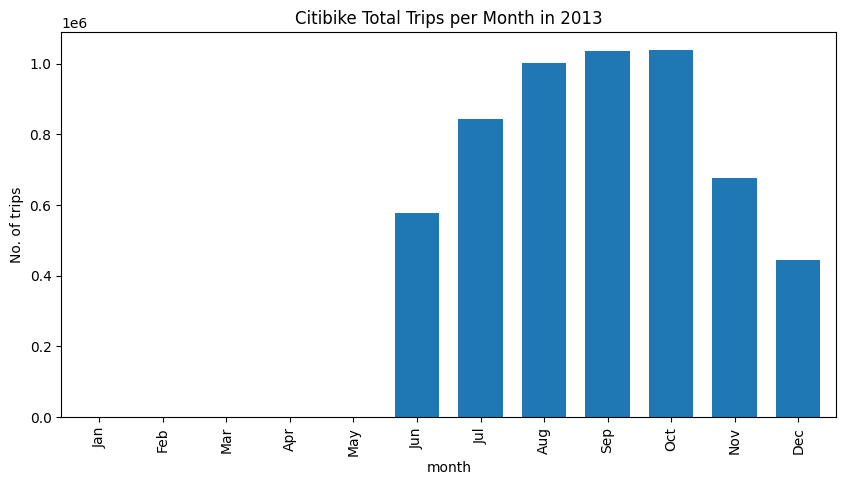

In [30]:
plot_tripcount_monthly('2013', data_2013)

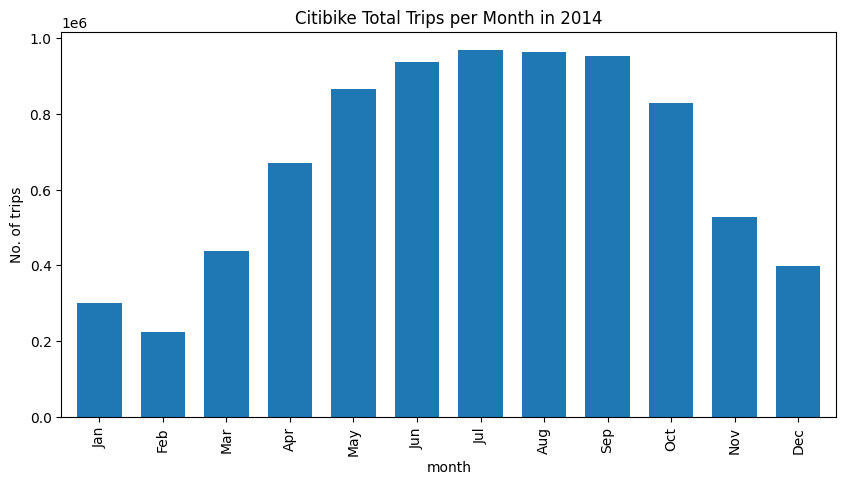

In [31]:
plot_tripcount_monthly('2014', data_2014)

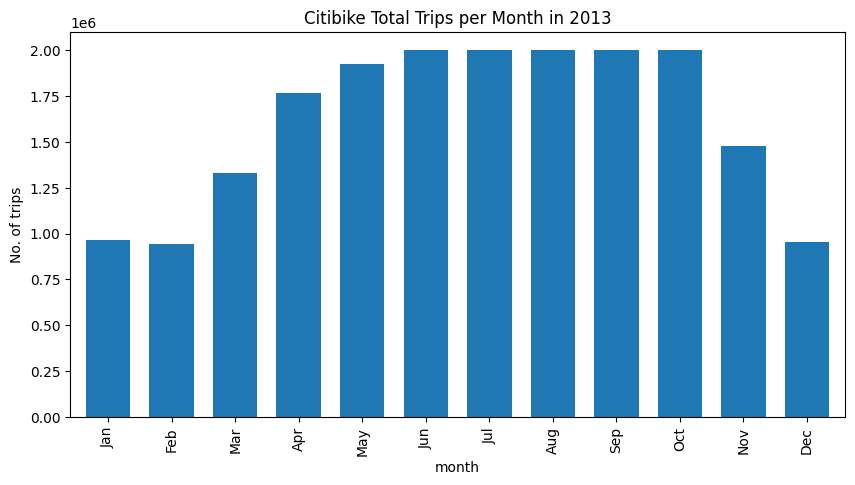

In [32]:
plot_tripcount_monthly('2013', data_2019)

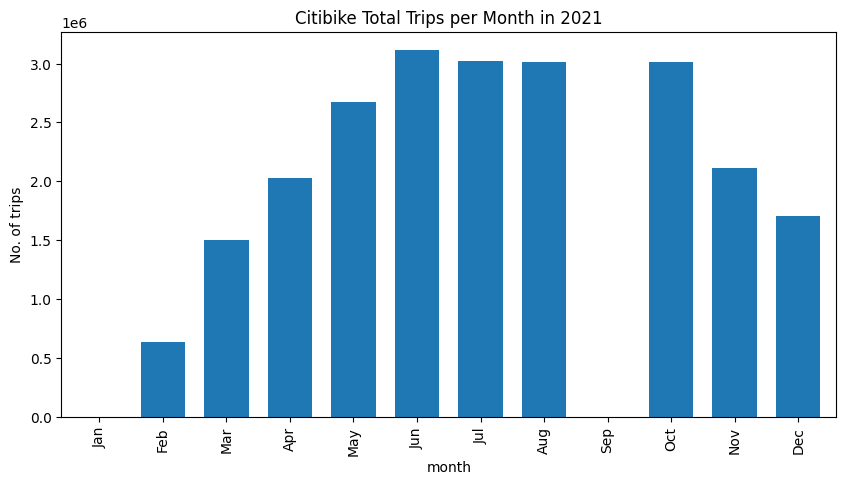

In [34]:
plot_tripcount_monthly('2021', data_2021)

In [35]:
# If month is not specified, plot over whole year
def plot_triphour(year: str, df: dict):
    df_count = df["starttime"].groupby(df["starttime"].dt.hour).count()
    df_count.plot(kind="bar",  figsize=(10, 5), ylabel='count')
    plt.title(f'Trip Hour Distribution {year}', fontsize=16)


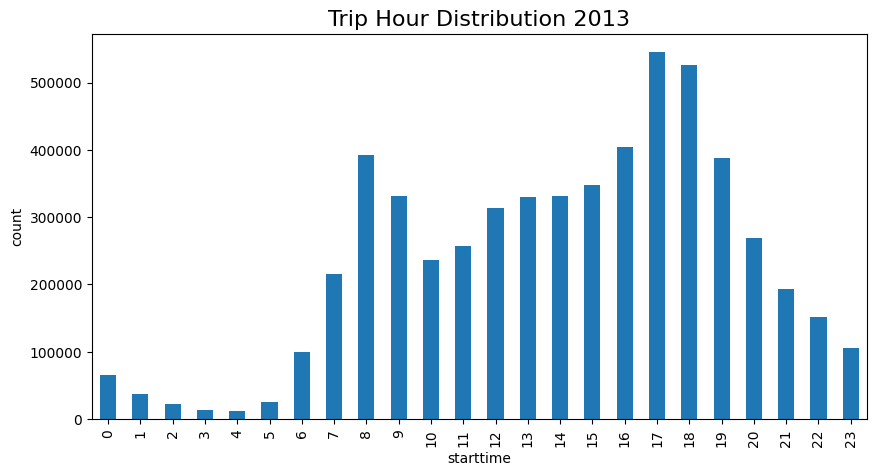

In [36]:
plot_triphour('2013', data_2013)

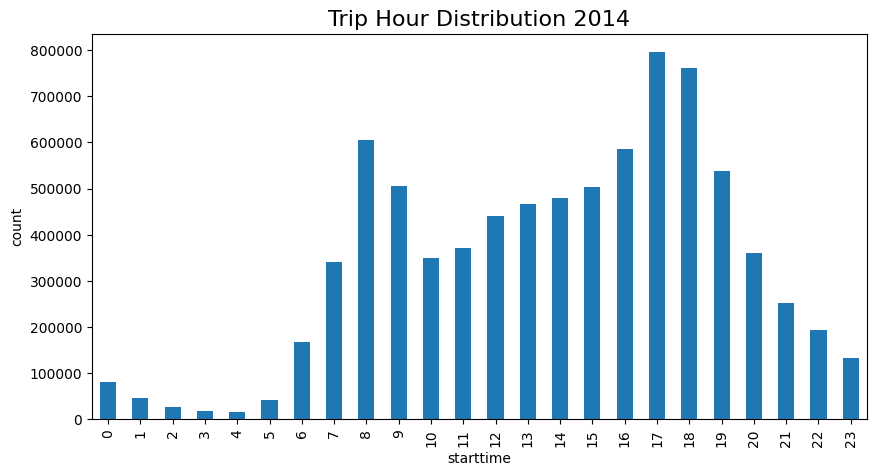

In [37]:
plot_triphour('2014', data_2014)

In [38]:
def plot_age_distribution(year, df):
    df['age'] = int(year) - df['birth year']
    fig = plt.figure(figsize = (10, 5))
    ax = df['age'].plot(kind='hist', bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
    ax.set_xlim([0, 100])
    plt.title(f'Relative Age Distribution {year}', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Relative Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()
    
def plot_age_distribution_kde(year, df):
    df['age'] = int(year) - df['birth year']
    fig = plt.figure(figsize = (10, 5))

    ax = sns.kdeplot(df['age'], fill=True, color='skyblue')

    # Convert density to percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
    
    plt.title('Relative Age Distribution (KDE)', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

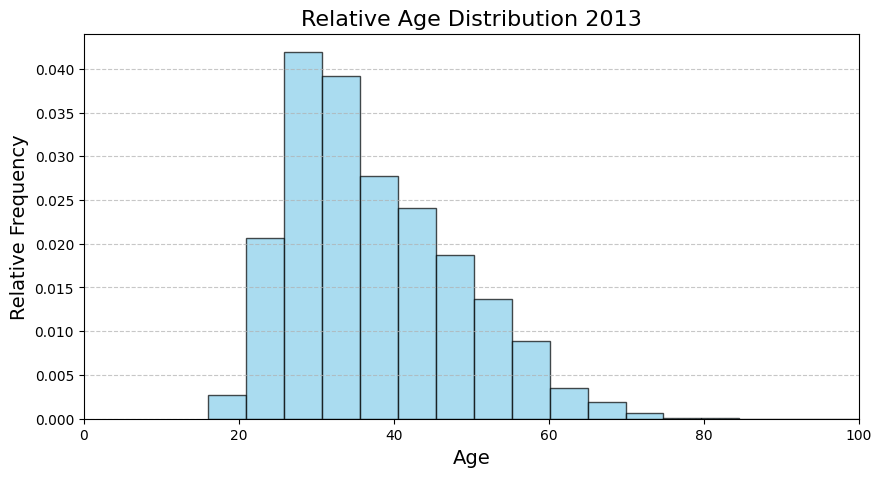

In [39]:
plot_age_distribution('2013', data_2013)

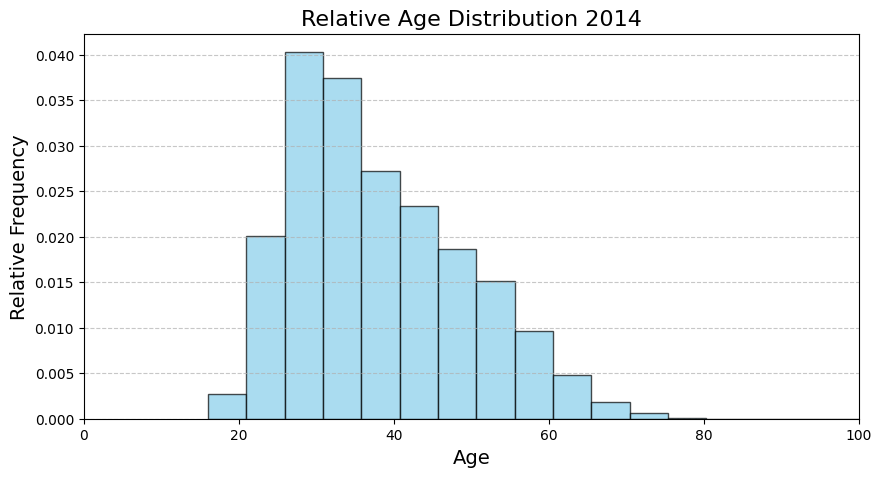

In [40]:
plot_age_distribution('2014', data_2014)

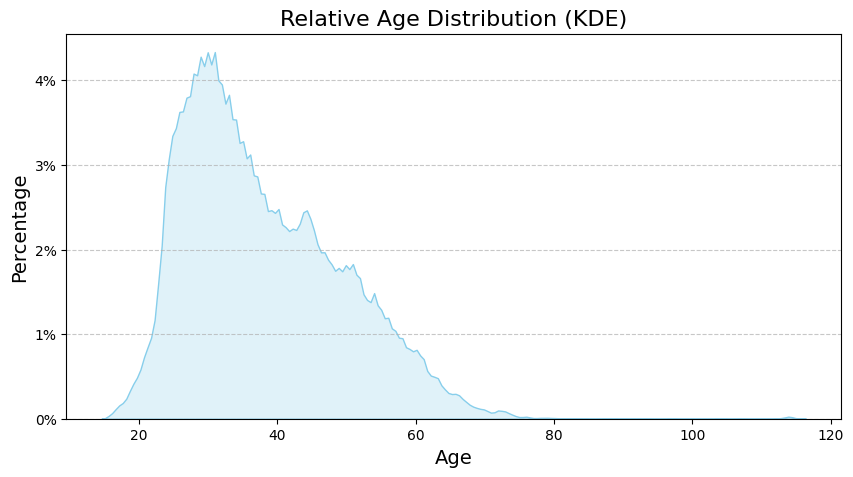

In [41]:
plot_age_distribution_kde('2014', data_2014)

# Insights into citibike data:
- Most trips between 6 am and 23 pm
- More trips in March to October
- Mostly young people

In [42]:
def plot_age_evolution(start_year, end_year):
    age_groups = [0, 8, 17, 26, 35, 44, 53, 62, 71, 100]  # 100+ to include all possible ages
    age_group_labels = ['0-8', '9-17', '18-26', '27-35', '36-44', '45-53', '54-62','63-71', '72+']
    results = []
    year_kde_data = []
    years = [year for year in range(start_year, end_year + 1)]
    for year in years:
        year_df = load_data('tripdata', year)
        year_df = year_df[['birth year']]
        year_df['age'] = year - year_df['birth year']
        year_df['age_group'] = pd.cut(year_df['age'], bins=age_groups, labels=age_group_labels, right=False)
        age_group_counts = year_df['age_group'].value_counts(normalize=False)# * 100  # Percentages
        age_group_counts = age_group_counts.reindex(age_group_labels)
        print(age_group_counts)
        results.append(age_group_counts)
        year_df['year'] = year
        year_kde_data.append(year_df[['age', 'year']])
        
    heatmap_data = pd.DataFrame(results, index=years).fillna(0)
    heatmap_change = heatmap_data.pct_change().fillna(0) * 100  # Percent change to the previous year

    year_kde_data = pd.concat(year_kde_data, ignore_index=True)

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    heatmap = sns.heatmap(heatmap_change, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Change [%]'}, linewidths=0.5)
    plt.title('Yearly Percentage Change to Previous Year per Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Year')
    fig = heatmap.get_figure()
    fig.savefig(f"../plots/age_evolution/heatmap_{start_year}_to_{end_year}.png") 
    plt.show()

    # Plot ridge line plot
    g = sns.FacetGrid(year_kde_data, row="year", hue="year", aspect=4, height=1.5, palette="coolwarm", sharey=False)
    g.map(sns.kdeplot, "age", fill=True, alpha=0.6, linewidth=1.5)
    
    g.set_titles("{row_name}")
    g.set(yticks=[], ylabel="", xlabel="Age")
    g.set(xlim=(0, 90))

    g.despine(left=True)
    g.fig.subplots_adjust(hspace=0.3)
    g.fig.suptitle('Age Distribution by Year', fontsize=16, y=1.02)

    g.savefig(f"../plots/age_evolution/ridge_plot_{start_year}_to_{end_year}.png")
    plt.show()

In [43]:
# Runs for 20 mins
# plot_age_evolution(2013, 2019)

# Inspect NYPD Crash data

In [44]:
# Functions to load and process NYPD data
data_nypd = load_data('nypd')

Trying to load file from disk.


C:\Users\Joris\AppData\Local\Temp\ipykernel_11196\848879554.py:141: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


Loaded file from disk.


In [45]:
data_nypd['NUMBER OF CYCLIST INJURED'].value_counts()

NUMBER OF CYCLIST INJURED
0    2079039
1      58192
2        672
3         24
4          1
Name: count, dtype: int64

In [46]:
data_nypd['NUMBER OF CYCLIST KILLED'].value_counts()

NUMBER OF CYCLIST KILLED
0    2137671
1        256
2          1
Name: count, dtype: int64

In [47]:
date_range = str(data_nypd['CRASH DATE'].dt.date.min()) + ' to ' +str(data_nypd['CRASH DATE'].dt.date.max())
print(date_range)

2012-07-01 to 2024-11-25


In [48]:
data_nypd.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2021-09-11,2,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,0,0,0,0,2,0,4455765,Sedan,Sedan
1,2022-03-26,11,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,0,0,0,1,0,4513547,Sedan,NaN
2,2022-06-29,6,NaN,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0,0,0,0,0,0,0,4541903,Sedan,Pick-up Truck
3,2021-09-11,9,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0.0,0.0,0,0,0,0,0,0,4456314,Sedan,NaN
4,2021-12-14,8,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0.0,0.0,0,0,0,0,0,0,4486609,NaN,NaN


In [49]:
#vehicle_codes = data_nypd['VEHICLE TYPE CODE 1'].value_counts()

In [50]:
#vehicle_codes['BICYCLE']

In [51]:
data_nypd.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137928 entries, 0 to 2137927
Data columns (total 17 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     int32         
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   NUMBER OF PERSONS INJURED      float64       
 7   NUMBER OF PERSONS KILLED       float64       
 8   NUMBER OF PEDESTRIANS INJURED  int64         
 9   NUMBER OF PEDESTRIANS KILLED   int64         
 10  NUMBER OF CYCLIST INJURED      int64         
 11  NUMBER OF CYCLIST KILLED       int64         
 12  NUMBER OF MOTORIST INJURED     int64         
 13  NUMBER OF MOTORIST KILLED      int64         
 14  COLLISION_ID                   int64         
 15  VEHICLE TYPE CO

In [52]:
# construct dataset for cyclist and motorist accidents
cyclist_accidents = data_nypd[
    (data_nypd["NUMBER OF CYCLIST INJURED"] > 0) | (data_nypd["NUMBER OF CYCLIST KILLED"] > 0)
]["COLLISION_ID"].unique()

motorist_accidents = data_nypd[
    (data_nypd["NUMBER OF MOTORIST INJURED"] > 0) | (data_nypd["NUMBER OF MOTORIST KILLED"] > 0)
]["COLLISION_ID"].unique()

# Datasets consist of unique COLLISION_ID's
cyclist_accidents_set = set(cyclist_accidents)
motorist_accidents_set = set(motorist_accidents)

# There can be overlap between cyclist and motorist accidents
# Use the difference and union between the cyclist and motorist sets to calculate the overlap
cyclist_only_accidents = len(cyclist_accidents_set - motorist_accidents_set)
motorist_only_accidents = len(motorist_accidents_set - cyclist_accidents_set)
both_cyclists_and_motorists = len(cyclist_accidents_set & motorist_accidents_set)

total_cyclist_accidents = cyclist_only_accidents + both_cyclists_and_motorists
total_motorist_accidents = motorist_only_accidents + both_cyclists_and_motorists

motorist_to_cyclist_ratio = total_motorist_accidents / total_cyclist_accidents

print(f"Total cyclist accidents (including overlaps): {total_cyclist_accidents}")
print(f"Total motorist accidents (including overlaps): {total_motorist_accidents}")
print(f"Accidents involving both cyclists and motorists: {both_cyclists_and_motorists}")
print(f"Ratio of motorist accidents to cyclist accidents: {motorist_to_cyclist_ratio:.2f}")

Total cyclist accidents (including overlaps): 59138
Total motorist accidents (including overlaps): 320207
Accidents involving both cyclists and motorists: 629
Ratio of motorist accidents to cyclist accidents: 5.41


In [53]:
total_cyclist_injured = data_nypd["NUMBER OF CYCLIST INJURED"].sum()
total_cyclist_killed = data_nypd["NUMBER OF CYCLIST KILLED"].sum()

total_motorist_injured = data_nypd["NUMBER OF MOTORIST INJURED"].sum()
total_motorist_killed = data_nypd["NUMBER OF MOTORIST KILLED"].sum()

likelihood_cyclist_killed = total_cyclist_killed / total_cyclist_injured if total_cyclist_injured > 0 else 0
likelihood_motorist_killed = total_motorist_killed / total_motorist_injured if total_motorist_injured > 0 else 0

print(f"Likelihood of a cyclist being killed: {likelihood_cyclist_killed:.2%}")
print(f"Likelihood of a motorist being killed: {likelihood_motorist_killed:.2%}")

Likelihood of a cyclist being killed: 0.43%
Likelihood of a motorist being killed: 0.28%


### The ratio of motorist accidents to cyclist accidents is 5.4

# Seasonal Trends in bicycle crashes

In [54]:
def plot_seasonal(df):    
    df['month'] = df['CRASH DATE'].dt.month

    # Categorize months into seasons
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['season'] = df['month'].apply(get_season)
    
    injured = df[df['NUMBER OF CYCLIST INJURED'] > 0]
    killed = df[df['NUMBER OF CYCLIST KILLED'] > 0]
    # Count total number of crashes per season
    total_per_season = df.groupby('season')['CRASH DATE'].count()
    injured_per_season = injured.groupby('season')['CRASH DATE'].count()
    killed_per_season = killed.groupby('season')['CRASH DATE'].count()
    
    # Calculate ratio of bicycle crashes to total crashes per season
    injured_ratio = (injured_per_season / total_per_season) * 100
    killed_ratio = (killed_per_season / total_per_season) * 100
    plt.figure(figsize=(14, 6))

    season_order = ['Spring', 'Summer', 'Fall', 'Winter']

    plt.subplot(1, 2, 1)
    sns.barplot(x=injured_ratio.index, y=injured_ratio.values, order=season_order)
    plt.title('Ratio of Crashes with Injured Cyclists per Season')
    plt.xlabel('Season')
    plt.ylabel('Ratio of Injured Cyclist Crashes (%)')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=killed_ratio.index, y=killed_ratio.values, order=season_order)
    plt.title('Ratio of Crashes with Killed Cyclists per Season')
    plt.xlabel('Season')
    plt.ylabel('Ratio of Killed Cyclist Crashes (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_hourly(df):

    # Only crashes where cyclists were injured or killed
    cyclist_crashes = df[(df['NUMBER OF CYCLIST INJURED'] > 0) | (df['NUMBER OF CYCLIST KILLED'] > 0)]
    
    # Group by hour (extracted before)
    hourly_cyclist_crashes = cyclist_crashes.groupby('CRASH TIME').size()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=hourly_cyclist_crashes.index, y=hourly_cyclist_crashes.values)
    
    plt.title('Number of Cyclists Crashes Per Hour (Injured or Killed) 2012-07-01 to 2024-11-25')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Crashes')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()

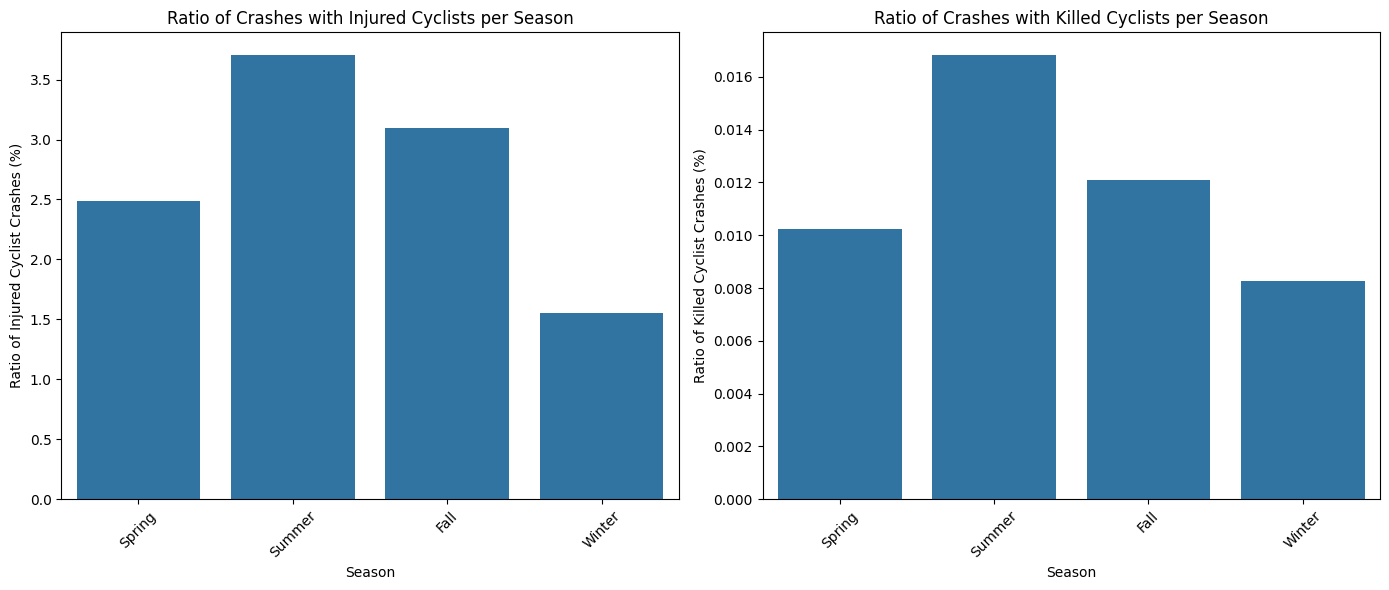

In [55]:
plot_seasonal(data_nypd)

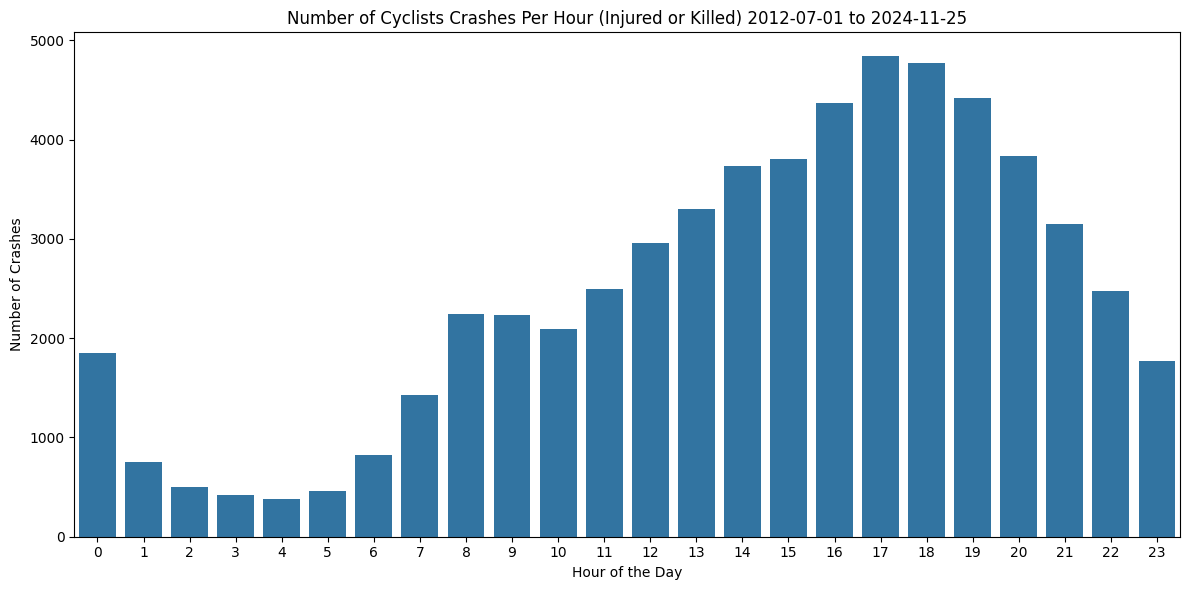

In [56]:
plot_hourly(data_nypd)

# Analyse geo data from citibke and nypd

## Station locations on map:
### Color and size corresponds to the count in the dataset

In [57]:
# Functions to extract geodata in the form of latitude and longitude
lat_min, lat_max = 40.3774, 41.0176
lon_min, lon_max = -74.3591, -73.6004

def get_crash_geodata_yearly(df, year, filter_position=True, only_bike=False):
    nypd_geo_header = {
        'ON STREET NAME': 'name',
        'LATITUDE': 'latitude',
        'LONGITUDE': 'longitude'}
    
    if only_bike:
        df = df[(df['NUMBER OF CYCLIST INJURED'] > 0) | (df['NUMBER OF CYCLIST KILLED'] > 0)]

    
    df = df[df["CRASH DATE"].dt.year == year]

    # Select latitude and longitude columns
    df = df[["LATITUDE", "LONGITUDE", "ON STREET NAME"]].dropna(subset=["LATITUDE", "LONGITUDE"])
    
    df = df.rename(columns=nypd_geo_header)

    # There are positions outside of new york in the data set (In the pacific ocean)
    if filter_position:
        df = df[(df['latitude'] >= lat_min) & 
                  (df['latitude'] <= lat_max) &
                  (df['longitude'] >= lon_min) & 
                  (df['longitude'] <= lon_max)]
    

    return df

def get_citibike_geodata(df, include_counts=False):
    citibike_geo_header = {
        'start station name': 'name',
        'start station latitude': 'latitude',
        'start station longitude': 'longitude'}
    
    if include_counts:
        df = df.groupby(['start station name', "start station latitude", "start station longitude"]).size().reset_index(name='count')
    else:
        df.drop_duplicates(subset=['start station name'], keep="first")
        df = df[['start station name', "start station latitude", "start station longitude"]]
    df = df.rename(columns=citibike_geo_header)
    
    return df

In [58]:
import plotly.io as pio
pio.renderers.default = 'iframe'
from sklearn.cluster import DBSCAN

# Including counts fails for large data frames
def plot_positions(position_counts, include_counts=False):
    if include_counts:
        color = "count"
        size = "count"
        hover_data=['name', 'count']
    else:
        color = None
        size = None
        hover_data=['name']
    color_scale = [(0, 'orange'), (1,'red')]
    fig = px.scatter_mapbox(position_counts, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_name='name', 
                            hover_data=hover_data,
                            color=color,
                            color_continuous_scale=color_scale,
                            size=size,
                            zoom=8, 
                            height=800,
                            width=800)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()


def plot_positions_cluster(position_counts, batch_size = 20000, eps=0.001, min_samples=5):
    # Convert to radians for dbscan
    coords = np.radians(position_counts[["latitude", "longitude"]].to_numpy())

    # Use haversine distance to compute geographical distances
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='haversine') # , algorithm='ball_tree'
    clusters = []
    for start in range(0, len(coords), batch_size):
        print(f'processing batch {start / batch_size}')
        end = min(start + batch_size, len(coords))
        batch_coords = coords[start:end]

        # Fit DBSCAN on current batch
        batch_labels = db.fit_predict(batch_coords)
        batch_clusters = pd.DataFrame({
            'latitude': position_counts['latitude'].iloc[start:end],
            'longitude': position_counts['longitude'].iloc[start:end],
            'cluster': batch_labels
        })
        clusters.append(batch_clusters)

    # Combine the batches into single DataFrame
    clustered_positions = pd.concat(clusters, ignore_index=True)
    clustered_positions = clustered_positions[clustered_positions['cluster'] != -1]
    num_clusters = len(clustered_positions['cluster'].unique())

    print(f"Number of clusters (excluding noise): {num_clusters}")

    cluster_counts = clustered_positions.groupby('cluster').agg(
            latitude=('latitude', 'mean'),
            longitude=('longitude', 'mean'),
            count=('latitude', 'size')
        ).reset_index()

    # Use 'count' for color and size
    color = "count"
    size = "count"
    hover_data = ['count', 'cluster']

    color_scale = [(0, 'orange'), (1, 'red')]
    fig = px.scatter_mapbox(cluster_counts, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_name='cluster', 
                            hover_data=hover_data,
                            color=color,
                            color_continuous_scale=color_scale,
                            size=size,
                            zoom=8, 
                            height=800,
                            width=800)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [59]:
station_counts_2013 = get_citibike_geodata(data_2013, include_counts=True)

In [60]:
plot_positions(station_counts_2013, include_counts = True)

In [61]:
station_counts_2021 = get_citibike_geodata(data_2021, include_counts=True)

In [62]:
plot_positions(station_counts_2021, include_counts = True)

In [63]:
# There are positions outside of new york in the nypd crash dataset
print(len(get_crash_geodata_yearly(data_nypd, 2022, filter_position=False).index))
print(len(get_crash_geodata_yearly(data_nypd, 2022, filter_position=True).index))

94943
93078


In [64]:
nypd_crash_stations_2022 = get_crash_geodata_yearly(data_nypd, 2022)

In [65]:
plot_positions(nypd_crash_stations_2022)

In [66]:
# eps=0.00001, min_samples=15
# General crashes:
plot_positions_cluster(nypd_crash_stations_2022, batch_size = 93078, eps=0.000014, min_samples=10)

processing batch 0.0
Number of clusters (excluding noise): 1959


In [67]:
nypd_crash_stations_2022_bike = get_crash_geodata_yearly(data_nypd, 2022, only_bike=True)

In [68]:
len(nypd_crash_stations_2022_bike.index)

4563

In [77]:
plot_positions(nypd_crash_stations_2022_bike)

In [76]:
plot_positions_cluster(nypd_crash_stations_2022_bike, batch_size = 4563, eps=0.000012, min_samples=5)

processing batch 0.0
Number of clusters (excluding noise): 34


# More Ideas:
- Predict number of trips for given station at specific time
- Could use e.g. random forest with station 

# Cooperation Ideas:
- Citibike members have automatic health insurance
- Insurance members have automatic citibike membership
- Provide cheaper insurance rates for people with citibike membership
  
# Health insurance company would benefit from cooperation with citibike:
- Less accidents compared to car --> promote bike usage over car
- More exercise when using bike, older demographic become more mobile --> lower risk profile regarding health issues
- Access to young demographic --> lower risk profile regarding health issues

# Citibike would benefit from insurance:
- Bike crashes have higher probability of death compared to car
- Bike traffic highest on months, hours, and location where most crashes occur

# Ideas to Increase Safety

- Automatically plan safer routes based on crash hotspots
- Cheaper rides when riding is safer: 1-10 am, after 22 pm.